# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [141]:
import pandas as pd
import numpy as np

#visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

#data splitting
from sklearn.model_selection import train_test_split

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#linear regression_model
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.tools import add_constant

#linear model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

#tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Mounting google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/Hotels.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head(10) #pulling the first ten values

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
objs = df.select_dtypes(include = object).columns.tolist() #creating a list of the objects
objs.remove('Booking_ID')

In [ ]:
for ob in objs:
  print(df[ob].value_counts()) #checking to see what values appeared what their frequency was

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


In [ ]:
df.describe() #statistical breakdown of the numerical data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

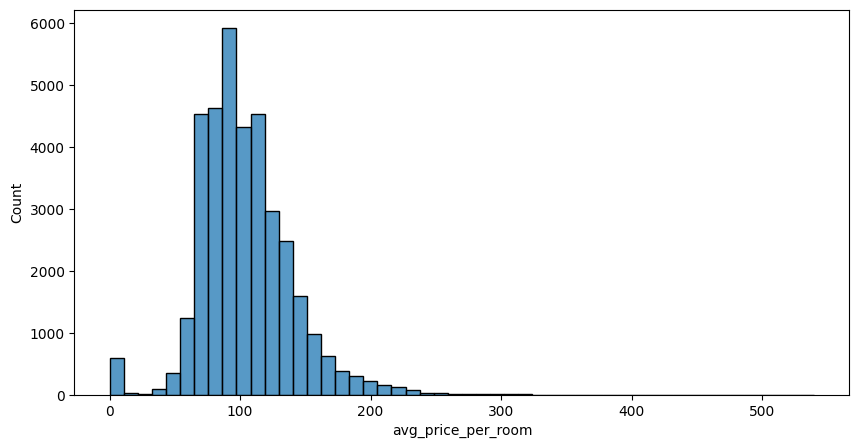

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = 'avg_price_per_room', bins = 50) #checking distribution of room price

In [92]:
df['total_nights'] = df[['no_of_weekend_nights', 'no_of_week_nights']].sum(axis=1)

df.head() #creating a total nights variable

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


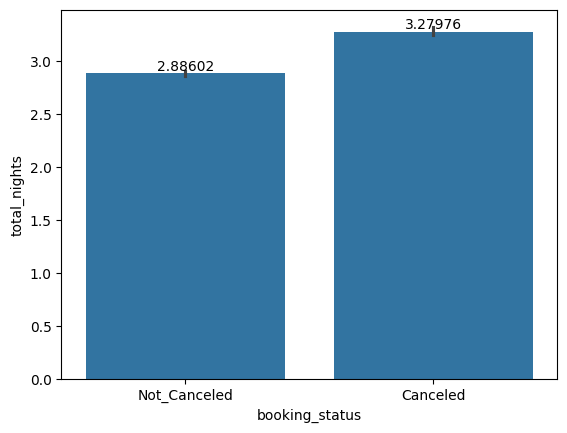

In [ ]:
ax = sns.barplot(df, x = 'booking_status', y = 'total_nights') #checking if amount nights spent influenced cancelation
for i in ax.containers:
    ax.bar_label(i,)

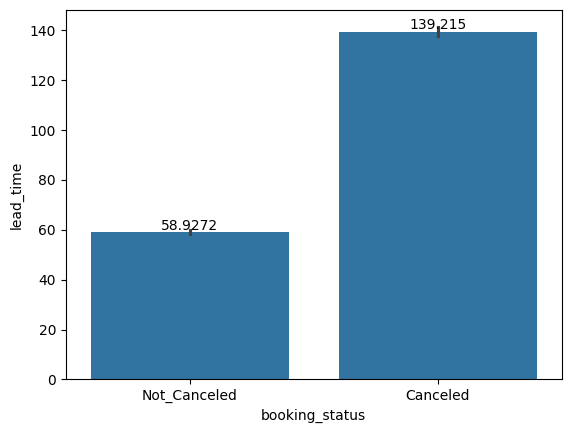

In [ ]:
ax = sns.barplot(df, x = 'booking_status', y = 'lead_time') #checking relationship betweeen lead time and cancelation
for i in ax.containers:
    ax.bar_label(i,)

lead time seems to significantly impact cancelation, with greater lead times being more likely to cancel

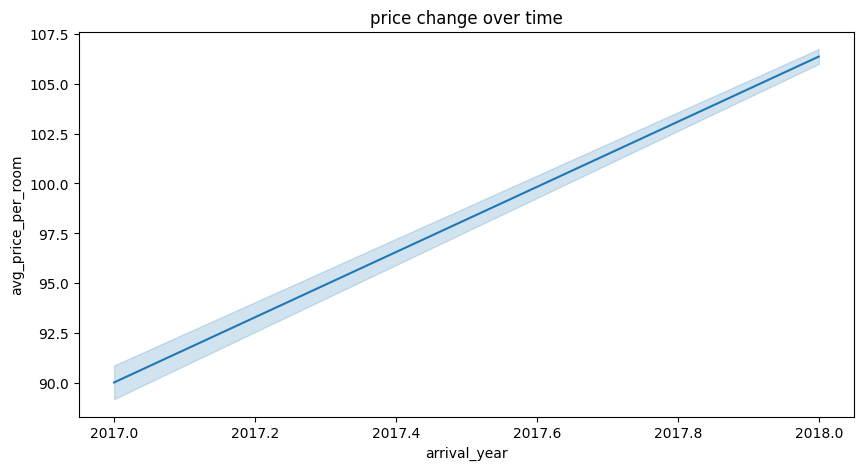

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x = 'arrival_year', y = 'avg_price_per_room') #checking the price change over time
plt.title('price change over time')
plt.show()

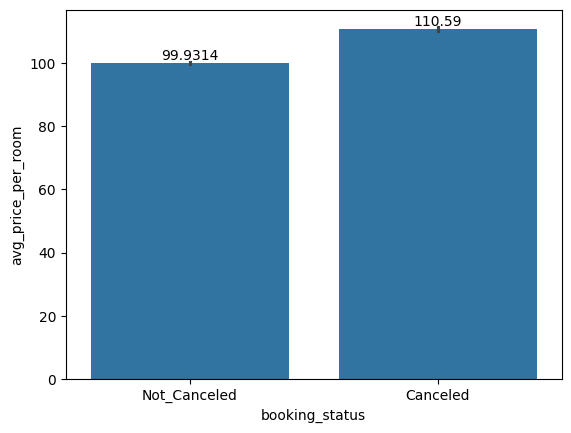

In [ ]:
ax = sns.barplot(df, x = 'booking_status', y = 'avg_price_per_room') #checking relationship betweeen lead time and cancelation
for i in ax.containers:
    ax.bar_label(i,)

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

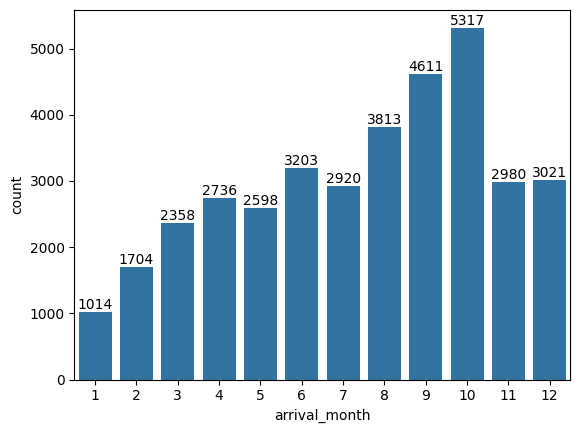

In [ ]:
ax = sns.countplot(df, x= 'arrival_month') #creating a countplot to see which months had the most arrivals
for i in ax.containers:
    ax.bar_label(i,)

September and october were the busiest months for the hotels

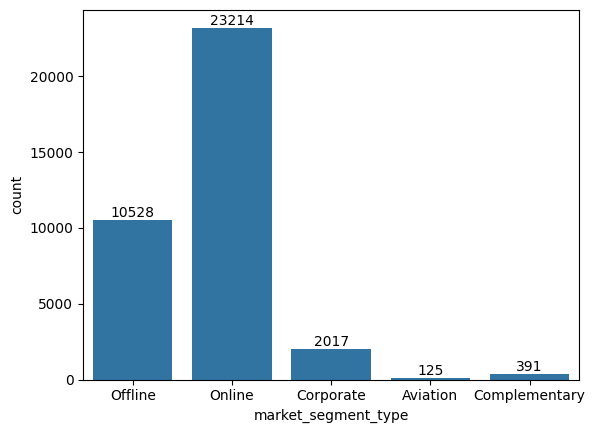

In [ ]:
ax = sns.countplot(df, x = 'market_segment_type') #countplot to visualize the amount of guests per market segment
for i in ax.containers:
    ax.bar_label(i,)

Online had the most amount of guests, aviation had the least

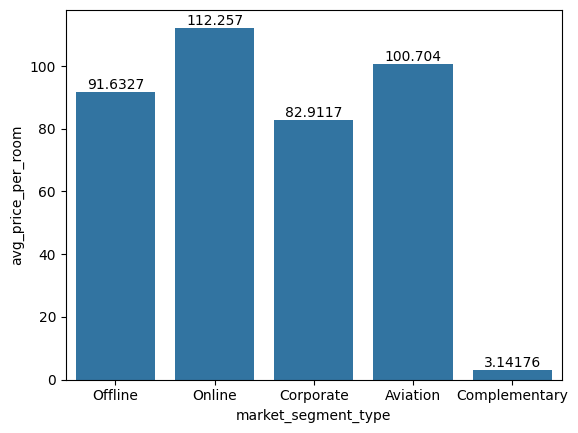

In [ ]:
ax = sns.barplot(df, x = 'market_segment_type', y = 'avg_price_per_room', errorbar = None) #Barplot to visualize the relationship between market segment and price per room
for i in ax.containers:
    ax.bar_label(i,)

Online had the highest average price per room, complementary naturally had the lowest. Corporate was cheaper than the other paid options

In [ ]:
x = df.booking_status.value_counts()['Canceled'] #finding the amount of canceled reservations and dividing by the total

print(round((x/df.shape[0]) * 100,2),"percent of bookings are canceled")

32.76 percent of bookings are canceled


In [ ]:
x = df.groupby(['repeated_guest'])['booking_status'].value_counts()[1, 'Canceled'] #grouping cancelation by repeated guest to find the percentage of repeated guests who cancel
total = df.repeated_guest.value_counts()[1]
print(round((x/total) * 100, 2), "percent of bookings are canceled by returning guests")

1.72 percent of bookings are canceled by returning guests


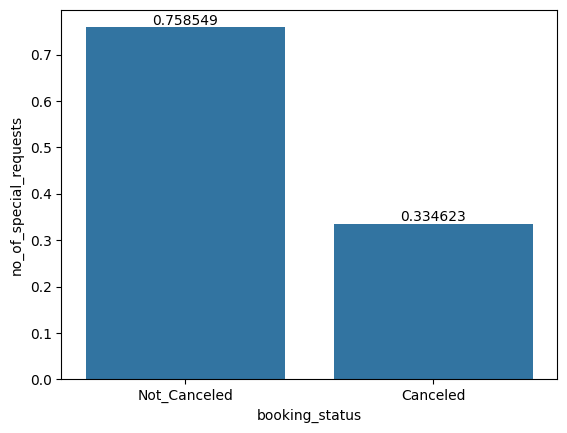

In [ ]:
ax = sns.barplot(df, x = 'booking_status', y = 'no_of_special_requests', errorbar = None) #comparing the relationship booking status and special requests
for i in ax.containers:
    ax.bar_label(i,)

Canceled bookings had less special requests on average

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.isnull().values.any() #no null values

False

No Nulls found

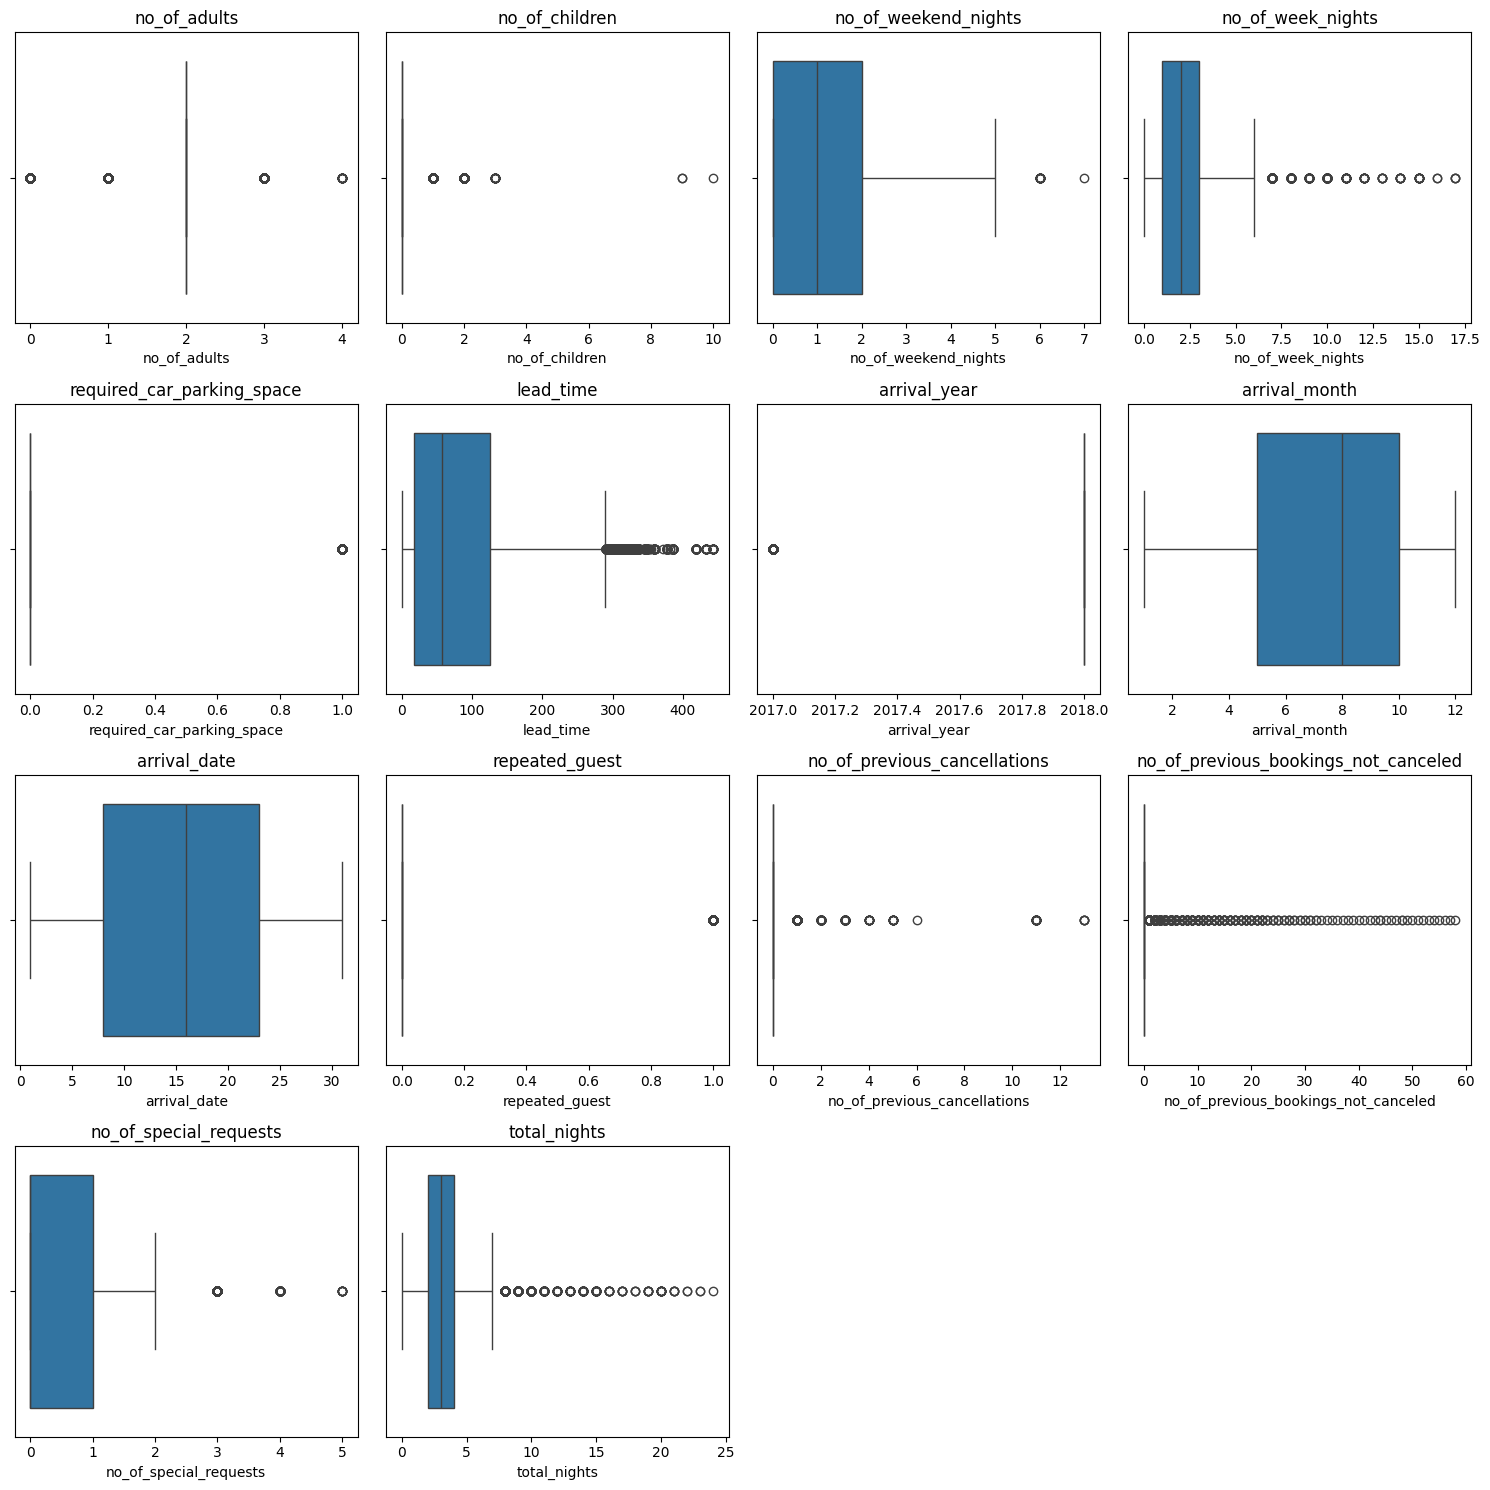

In [ ]:
nums = df.select_dtypes(include = int).columns.tolist() #creating a list of the numerical values

plt.figure(figsize=(15, 15))

for i, num in enumerate(nums):   #looping through the list and creating boxplots
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df, x = num)
    plt.tight_layout()
    plt.title(num)

plt.show()

Many of the variables have outliers but outliers make sense within the categories, such as returning guests that frequent the hotel acting as outliers for cancellations and number of previous bookings not canceled. No outliers look entirely unatural here.

In [93]:
df2 = df.copy()

In [94]:
df2 = df2.drop(['Booking_ID'], axis = 1) #dropping booking ID due to lack of usefulness

In [95]:
df2['booking_status'] = df2['booking_status'].replace({'Not_Canceled':0, 'Canceled': 1}) #remapping booking status into numerical values

In [96]:
df2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2


In [ ]:
#creating dummy variables
#df2 = pd.get_dummies(df2, columns=['room_type_reserved', 'type_of_meal_plan','market_segment_type'], drop_first = True)

alternative dummy variable generation that i chose not to use, dummy variables are generated further down the notebook.

In [ ]:
df2.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


## EDA

- It is a good idea to explore the data once again after manipulating it.

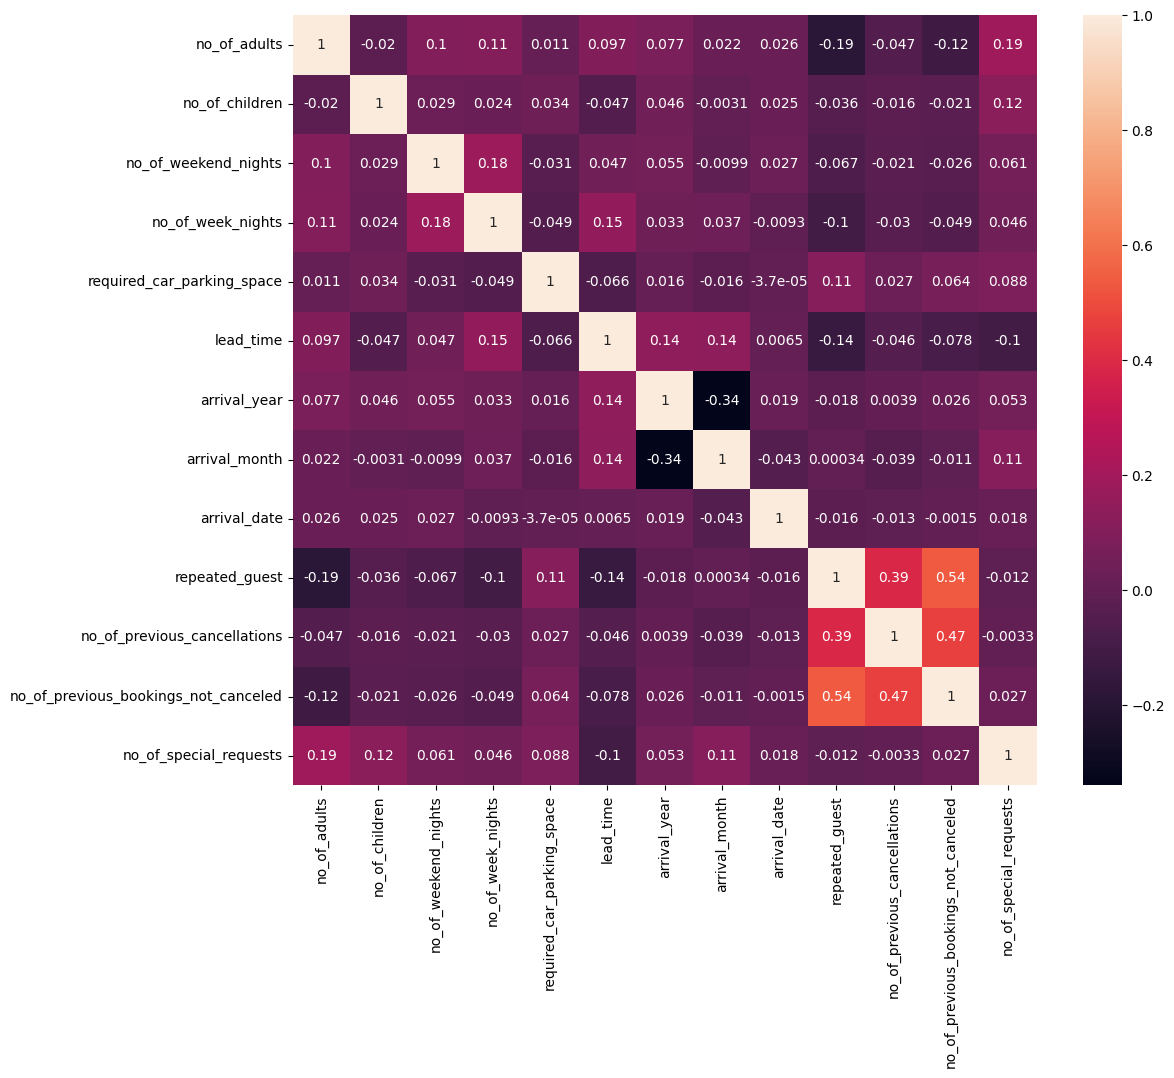

In [ ]:
#sns.set_context(rc = {'figure.figsize': (50,50)})

plt.figure(figsize=(12,10))
sns.heatmap(data = df[nums].corr(), annot=True)  #creating heatmap
plt.show()

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [97]:
#splitting data
X  = df2.drop(['booking_status'], axis = 1)
y = df2['booking_status']

In [98]:
X = add_constant(X) #adding constant to the data

In [99]:
X = pd.get_dummies(X, drop_first=True) #dummy variable creation

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1) #splitting the data

In [101]:
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.0,1,0,0,1,0,163,2018,10,15,...,0,0,0,0,0,0,0,0,1,0
26641,1.0,2,0,0,3,0,113,2018,3,31,...,1,0,0,0,0,0,0,0,0,1
17835,1.0,2,0,2,3,0,359,2018,10,14,...,0,0,0,0,0,0,0,0,1,0
21485,1.0,2,0,0,3,0,136,2018,6,29,...,0,0,0,0,0,0,0,0,0,1
5670,1.0,2,0,1,2,0,21,2018,8,15,...,0,0,0,0,0,0,0,0,0,1


In [102]:
X_test.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,0,1,0,0,53,2018,9,11,...,0,0,0,0,0,0,0,0,0,1
6685,1.0,2,0,1,2,0,63,2018,4,22,...,0,0,0,0,0,0,0,0,0,1
8369,1.0,2,0,2,3,0,55,2018,9,11,...,0,0,1,0,0,0,0,0,0,1
2055,1.0,2,0,0,2,0,53,2017,12,29,...,0,0,0,0,0,0,0,0,0,1
10969,1.0,1,0,2,4,0,245,2018,7,6,...,0,0,0,0,0,0,0,0,1,0


In [103]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,

)
print("VIF values: \n\n{}\n".format(vif_series1)) #checking for multicollinearity

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values: 

const                                   3.946816e+07
no_of_adults                            1.348154e+00
no_of_children                          1.978229e+00
no_of_weekend_nights                             inf
no_of_week_nights                                inf
required_car_parking_space              1.039928e+00
lead_time                               1.394914e+00
arrival_year                            1.430830e+00
arrival_month                           1.275673e+00
arrival_date                            1.006738e+00
repeated_guest                          1.783516e+00
no_of_previous_cancellations            1.395689e+00
no_of_previous_bookings_not_canceled    1.651986e+00
avg_price_per_room                      2.050421e+00
no_of_special_requests                  1.247278e+00
total_nights                                     inf
type_of_meal_plan_Meal Plan 2           1.271851e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected  

In [104]:
X_train1 = X_train.drop('total_nights', axis = 1) #dropping total nights due VIF score

In [105]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series1))#checking for multicollinearity

VIF values: 

const                                   3.946816e+07
no_of_adults                            1.348154e+00
no_of_children                          1.978229e+00
no_of_weekend_nights                    1.069475e+00
no_of_week_nights                       1.095667e+00
required_car_parking_space              1.039928e+00
lead_time                               1.394914e+00
arrival_year                            1.430830e+00
arrival_month                           1.275673e+00
arrival_date                            1.006738e+00
repeated_guest                          1.783516e+00
no_of_previous_cancellations            1.395689e+00
no_of_previous_bookings_not_canceled    1.651986e+00
avg_price_per_room                      2.050421e+00
no_of_special_requests                  1.247278e+00
type_of_meal_plan_Meal Plan 2           1.271851e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.272183e+00
room_type_reserved_Room_Type 2  

In [106]:
X_train2 = X_train1.drop('market_segment_type_Online', axis = 1) #removing due to multicollinearity

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series1))#checking for multicollinearity

VIF values: 

const                                   3.939137e+07
no_of_adults                            1.331784e+00
no_of_children                          1.977350e+00
no_of_weekend_nights                    1.069039e+00
no_of_week_nights                       1.095118e+00
required_car_parking_space              1.039795e+00
lead_time                               1.390637e+00
arrival_year                            1.428376e+00
arrival_month                           1.274625e+00
arrival_date                            1.006721e+00
repeated_guest                          1.780188e+00
no_of_previous_cancellations            1.395447e+00
no_of_previous_bookings_not_canceled    1.651745e+00
avg_price_per_room                      2.049595e+00
no_of_special_requests                  1.242418e+00
type_of_meal_plan_Meal Plan 2           1.271497e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.270387e+00
room_type_reserved_Room_Type 2  

No significant multicollineraity left

In [107]:
X_train2.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline
13662,1.0,1,0,0,1,0,163,2018,10,15,...,0,0,0,0,0,0,0,0,0,1
26641,1.0,2,0,0,3,0,113,2018,3,31,...,0,1,0,0,0,0,0,0,0,0
17835,1.0,2,0,2,3,0,359,2018,10,14,...,0,0,0,0,0,0,0,0,0,1
21485,1.0,2,0,0,3,0,136,2018,6,29,...,1,0,0,0,0,0,0,0,0,0
5670,1.0,2,0,1,2,0,21,2018,8,15,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1.0,1,0,1,0,0,53,2018,9,11,...,0,0,0,0,0,0,0,0,0,1
6685,1.0,2,0,1,2,0,63,2018,4,22,...,0,0,0,0,0,0,0,0,0,1
8369,1.0,2,0,2,3,0,55,2018,9,11,...,0,0,1,0,0,0,0,0,0,1
2055,1.0,2,0,0,2,0,53,2017,12,29,...,0,0,0,0,0,0,0,0,0,1
10969,1.0,1,0,2,4,0,245,2018,7,6,...,0,0,0,0,0,0,0,0,1,0


## Building a Logistic Regression model

##Both false positives and false negatives impact the hotel chain. An unpredicted cancellation will cost the hotel, since the room will go unoccupied and the hotels profitability will be impacted. However, if the hotel predicts a cancellation but the booking is maintained, the hotel may overbook itself and be unable to properly accomodate its customers. Therefore, accuracy and f1 score will be used to try and cover both false negatives and positives.

In [108]:
log_mod = sm.Logit(y_train, X_train2.astype(float))
log_fit = log_mod.fit()

         Current function value: 0.425084
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
print(log_fit.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3292
Time:                        15:03:38   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

In [110]:
X_train3 = X_train2.drop('market_segment_type_Complementary', axis = 1) #dropping the highest p value

log_mod = sm.Logit(y_train, X_train3.astype(float)) #running new model without elimanted variable
log_fit = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.425592
         Iterations 13


In [ ]:
print(log_fit.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3284
Time:                        12:59:46   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -921.6259    120.472     -7.650      0.000   -1157.747    -685.504
no_of_adults                             0.1085      

In [111]:
X_train4 = X_train3.drop('room_type_reserved_Room_Type 3', axis = 1) #dropping the highest p value

log_mod = sm.Logit(y_train, X_train4.astype(float))
log_fit = log_mod.fit()
print(log_fit.summary())

Optimization terminated successfully.
         Current function value: 0.425592
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3284
Time:                        15:03:43   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -921.5961    120.

In [112]:
X_train5 = X_train4.drop('arrival_date', axis = 1) #dropping the highest p value

log_mod = sm.Logit(y_train, X_train5.astype(float))
log_fit = log_mod.fit()
print(log_fit.summary())

Optimization terminated successfully.
         Current function value: 0.425593
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3284
Time:                        15:03:46   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -921.5770    120.

In [113]:
X_train6 = X_train5.drop('type_of_meal_plan_Meal Plan 3', axis = 1) #dropping the highest p value

log_mod = sm.Logit(y_train, X_train6.astype(float))
log_fit = log_mod.fit()
print(log_fit.summary())

Optimization terminated successfully.
         Current function value: 0.425622
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3284
Time:                        15:03:48   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -918.8989    120.

In [114]:
X_train7 = X_train6.drop('no_of_previous_bookings_not_canceled', axis = 1) #dropping the highest p value

log_mod = sm.Logit(y_train, X_train7.astype(float))
log_fit = log_mod.fit()
print(log_fit.summary())

Optimization terminated successfully.
         Current function value: 0.425677
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.3283
Time:                        15:03:50   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615    

In [118]:
X_test.head()
X_test2 = X_test

## Model performance evaluation

In [115]:
pred_train = log_fit.predict(X_train7) > 0.5 #having .5 be the cutoff
pred_train = np.round(pred_train)

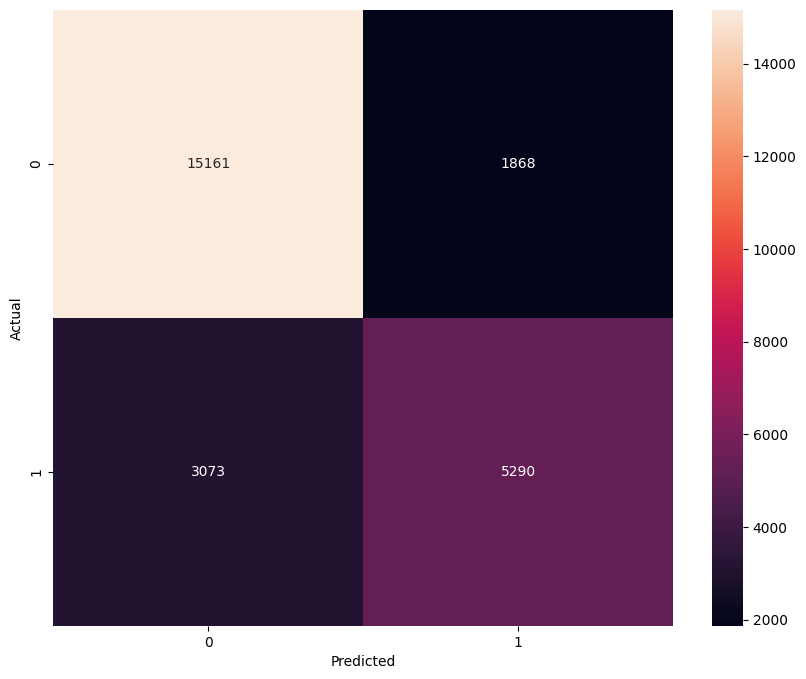

In [116]:
cm = confusion_matrix(y_train, pred_train) #creating confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [117]:
print('Training Accuracy', accuracy_score(y_train,pred_train))
print('Training F1 Score', f1_score(y_train, pred_train))

Training Accuracy 0.8054111531190926
Training F1 Score 0.6816571097223117


## Final Model Summary

In [119]:
X_test2 = X_test2.drop(['total_nights', 'market_segment_type_Online', 'market_segment_type_Complementary','room_type_reserved_Room_Type 3','arrival_date', 'no_of_previous_bookings_not_canceled', 'type_of_meal_plan_Meal Plan 3'], axis = 1)

In [120]:
X_train7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25392 non-null  float64
 1   no_of_adults                    25392 non-null  int64  
 2   no_of_children                  25392 non-null  int64  
 3   no_of_weekend_nights            25392 non-null  int64  
 4   no_of_week_nights               25392 non-null  int64  
 5   required_car_parking_space      25392 non-null  int64  
 6   lead_time                       25392 non-null  int64  
 7   arrival_year                    25392 non-null  int64  
 8   arrival_month                   25392 non-null  int64  
 9   repeated_guest                  25392 non-null  int64  
 10  no_of_previous_cancellations    25392 non-null  int64  
 11  avg_price_per_room              25392 non-null  float64
 12  no_of_special_requests      

In [121]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 30392 to 9399
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           10883 non-null  float64
 1   no_of_adults                    10883 non-null  int64  
 2   no_of_children                  10883 non-null  int64  
 3   no_of_weekend_nights            10883 non-null  int64  
 4   no_of_week_nights               10883 non-null  int64  
 5   required_car_parking_space      10883 non-null  int64  
 6   lead_time                       10883 non-null  int64  
 7   arrival_year                    10883 non-null  int64  
 8   arrival_month                   10883 non-null  int64  
 9   repeated_guest                  10883 non-null  int64  
 10  no_of_previous_cancellations    10883 non-null  int64  
 11  avg_price_per_room              10883 non-null  float64
 12  no_of_special_requests       

In [122]:
pred_test = log_fit.predict(X_test2) > 0.5
pred_test = np.round(pred_test)

print('Training Accuracy is ', accuracy_score(y_train, pred_train))
print('Testing Accuracy is ', accuracy_score(y_test, pred_test))

Training Accuracy is  0.8054111531190926
Testing Accuracy is  0.8046494532757512


Training and testing accuracy are very similar, hopefully pointing to a model that is not overfitting.

In [123]:
print('Training F1 Score is ', f1_score(y_train, pred_train))
print('Testing F1 Score is ', f1_score(y_test, pred_test))

Training F1 Score is  0.6816571097223117
Testing F1 Score is  0.6764079147640791


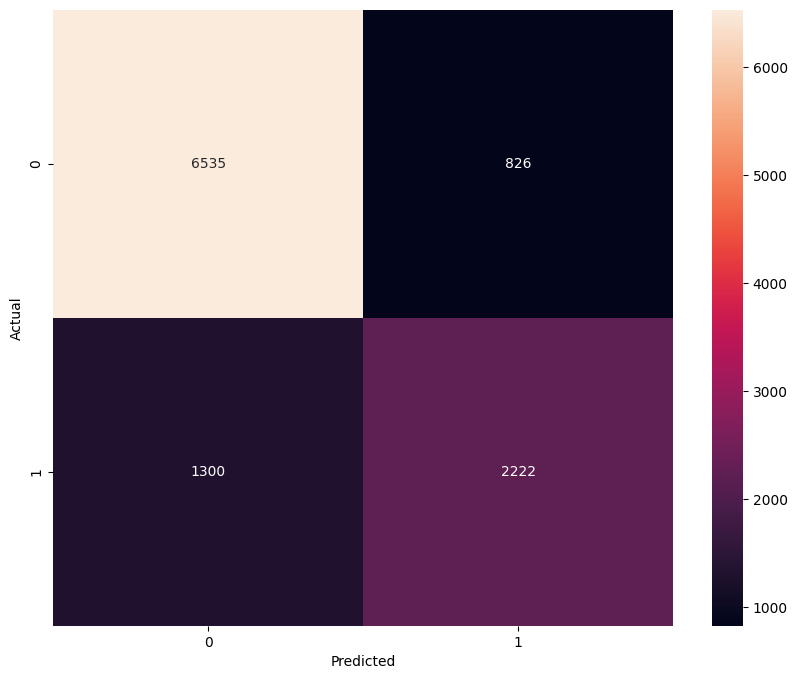

In [124]:
cm = confusion_matrix(y_test, pred_test) #making confusion matrix of the model perfomance on testing data
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [125]:
odds = (np.exp(log_fit.params) - 1) * 100  #converting the coefficients into the percentage change
print(odds)

const                            -100.000000
no_of_adults                       11.475363
no_of_children                     16.436009
no_of_weekend_nights               11.475256
no_of_week_nights                   4.263629
required_car_parking_space        -79.695231
lead_time                           1.583521
arrival_year                       57.323511
arrival_month                      -4.147245
repeated_guest                    -93.520258
no_of_previous_cancellations       25.715665
avg_price_per_room                  1.934790
no_of_special_requests            -77.005947
type_of_meal_plan_Meal Plan 2      17.991562
type_of_meal_plan_Not Selected     33.089244
room_type_reserved_Room_Type 2    -29.953888
room_type_reserved_Room_Type 4    -24.617006
room_type_reserved_Room_Type 5    -52.059666
room_type_reserved_Room_Type 6    -61.900934
room_type_reserved_Room_Type 7    -76.096691
market_segment_type_Corporate     -54.741616
market_segment_type_Offline       -83.249628
dtype: flo

These coefficients display how much more or less likely a cancelation is in relation to the variables used by the model. For example, likelihood of cancelation increases by 1.58 percent for everyday in advance that a booking is made. These can be used to get an idea of what metrics the hotel should be using when evaluating if a cancellation will take place or not.

## Building a Decision Tree model

In [126]:
df3 = df2.copy()

In [127]:
df3.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2


In [128]:
X = df3.drop(['booking_status'], axis = 1) #creating the dependent and independent variables

In [129]:
X = pd.get_dummies(X, drop_first=True) #creating dummy variables

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1) #splitting the data

In [131]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1,0,0,1,0,163,2018,10,15,0,...,0,0,0,0,0,0,0,0,1,0
26641,2,0,0,3,0,113,2018,3,31,0,...,1,0,0,0,0,0,0,0,0,1
17835,2,0,2,3,0,359,2018,10,14,0,...,0,0,0,0,0,0,0,0,1,0
21485,2,0,0,3,0,136,2018,6,29,0,...,0,0,0,0,0,0,0,0,0,1
5670,2,0,1,2,0,21,2018,8,15,0,...,0,0,0,0,0,0,0,0,0,1


In [132]:
dt = DecisionTreeClassifier(criterion= 'gini', random_state= 1) #creating a model without any pruning
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [133]:
print('Training Accuracy is', dt.score(X_train, y_train))
print('Testing Accuracy is', dt.score(X_test, y_test))

Training Accuracy is 0.994210775047259
Testing Accuracy is 0.8703482495635395


the model performs well on testing but is clearly overfitted as shown by the near perfect accuracy on testing data.

In [169]:
pred_train = dt.predict(X_train) #gathering f1 score
pred_test = dt.predict(X_test)

print("f1 on training set : ",metrics.f1_score(y_train,pred_train))
print("f1 on test set : ",metrics.f1_score(y_test,pred_test))

f1 on training set :  0.9911706408793322
f1 on test set :  0.8012396112128469


F1 score on training also indicates overfitting

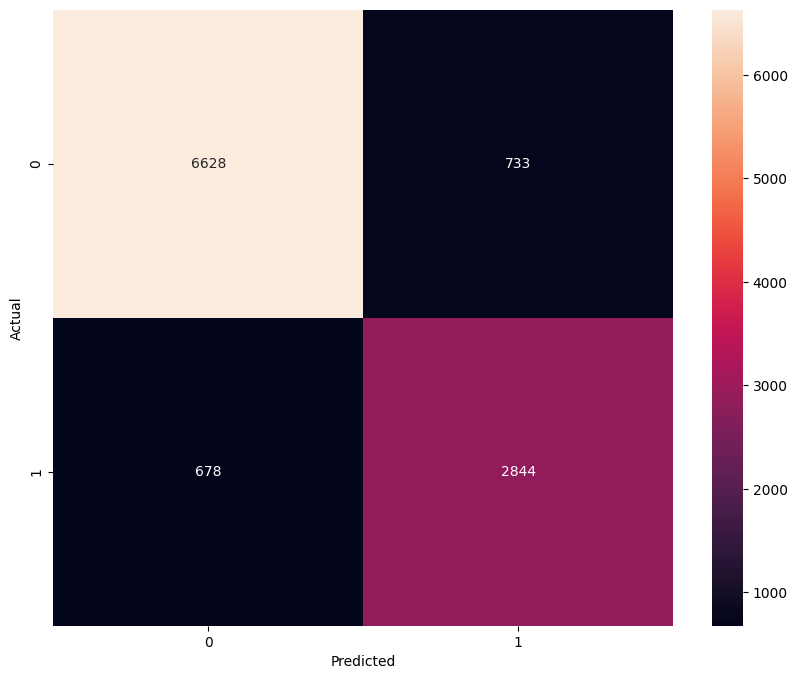

In [170]:
cm = confusion_matrix(y_test, pred_test) #making confusion matrix of the model perfomance on testing data
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [134]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_nights', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


## Do we need to prune the tree?

##Yes, it is overfitted, shown by the accuracy on training

In [143]:
dt2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1) # adding a max depth of 4 in order to reduce overfitting
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [144]:
X_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
30392,1,0,1,0,0,53,2018,9,11,0,...,0,0,0,0,0,0,0,0,0,1
6685,2,0,1,2,0,63,2018,4,22,0,...,0,0,0,0,0,0,0,0,0,1
8369,2,0,2,3,0,55,2018,9,11,0,...,0,0,1,0,0,0,0,0,0,1
2055,2,0,0,2,0,53,2017,12,29,0,...,0,0,0,0,0,0,0,0,0,1
10969,1,0,2,4,0,245,2018,7,6,0,...,0,0,0,0,0,0,0,0,1,0


In [137]:
print('Training Accuracy is', dt2.score(X_train, y_train))
print('Testing Accuracy is', dt2.score(X_test, y_test))

Training Accuracy is 0.8191556395715186
Testing Accuracy is 0.8200863732426721


The model is no longer as overfitted. it lost a significant amount of training performance but lost much less testing performance.

In [167]:
pred_train = dt2.predict(X_train) #gathering f1 score
pred_test = dt2.predict(X_test)

print("f1 on training set : ",metrics.f1_score(y_train,pred_train))
print("f1 on test set : ",metrics.f1_score(y_test,pred_test))

f1 on training set :  0.698370993168681
f1 on test set :  0.6942535915053092


Performs equally on testing and training data for f1 scores

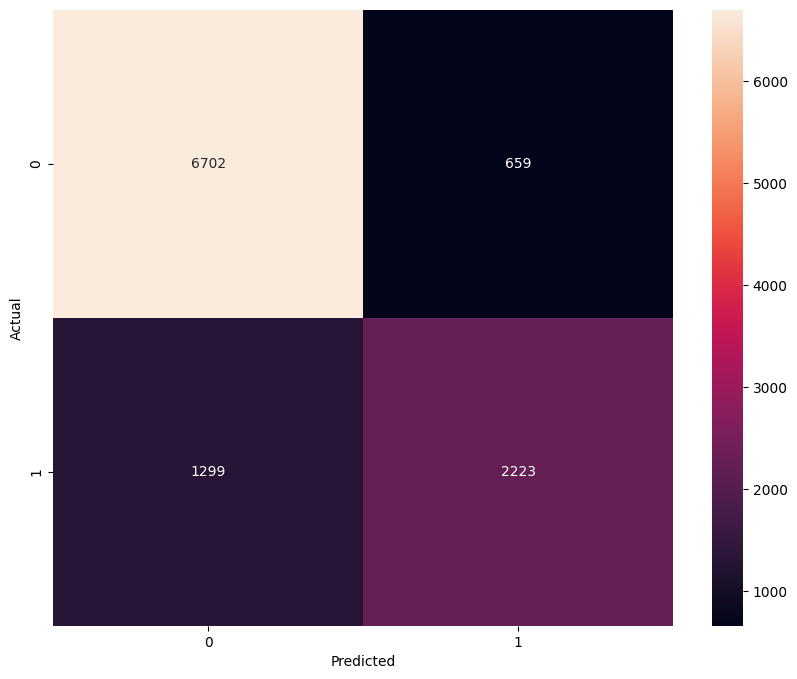

In [168]:
cm = confusion_matrix(y_test, pred_test) #making confusion matrix of the model perfomance on testing data
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

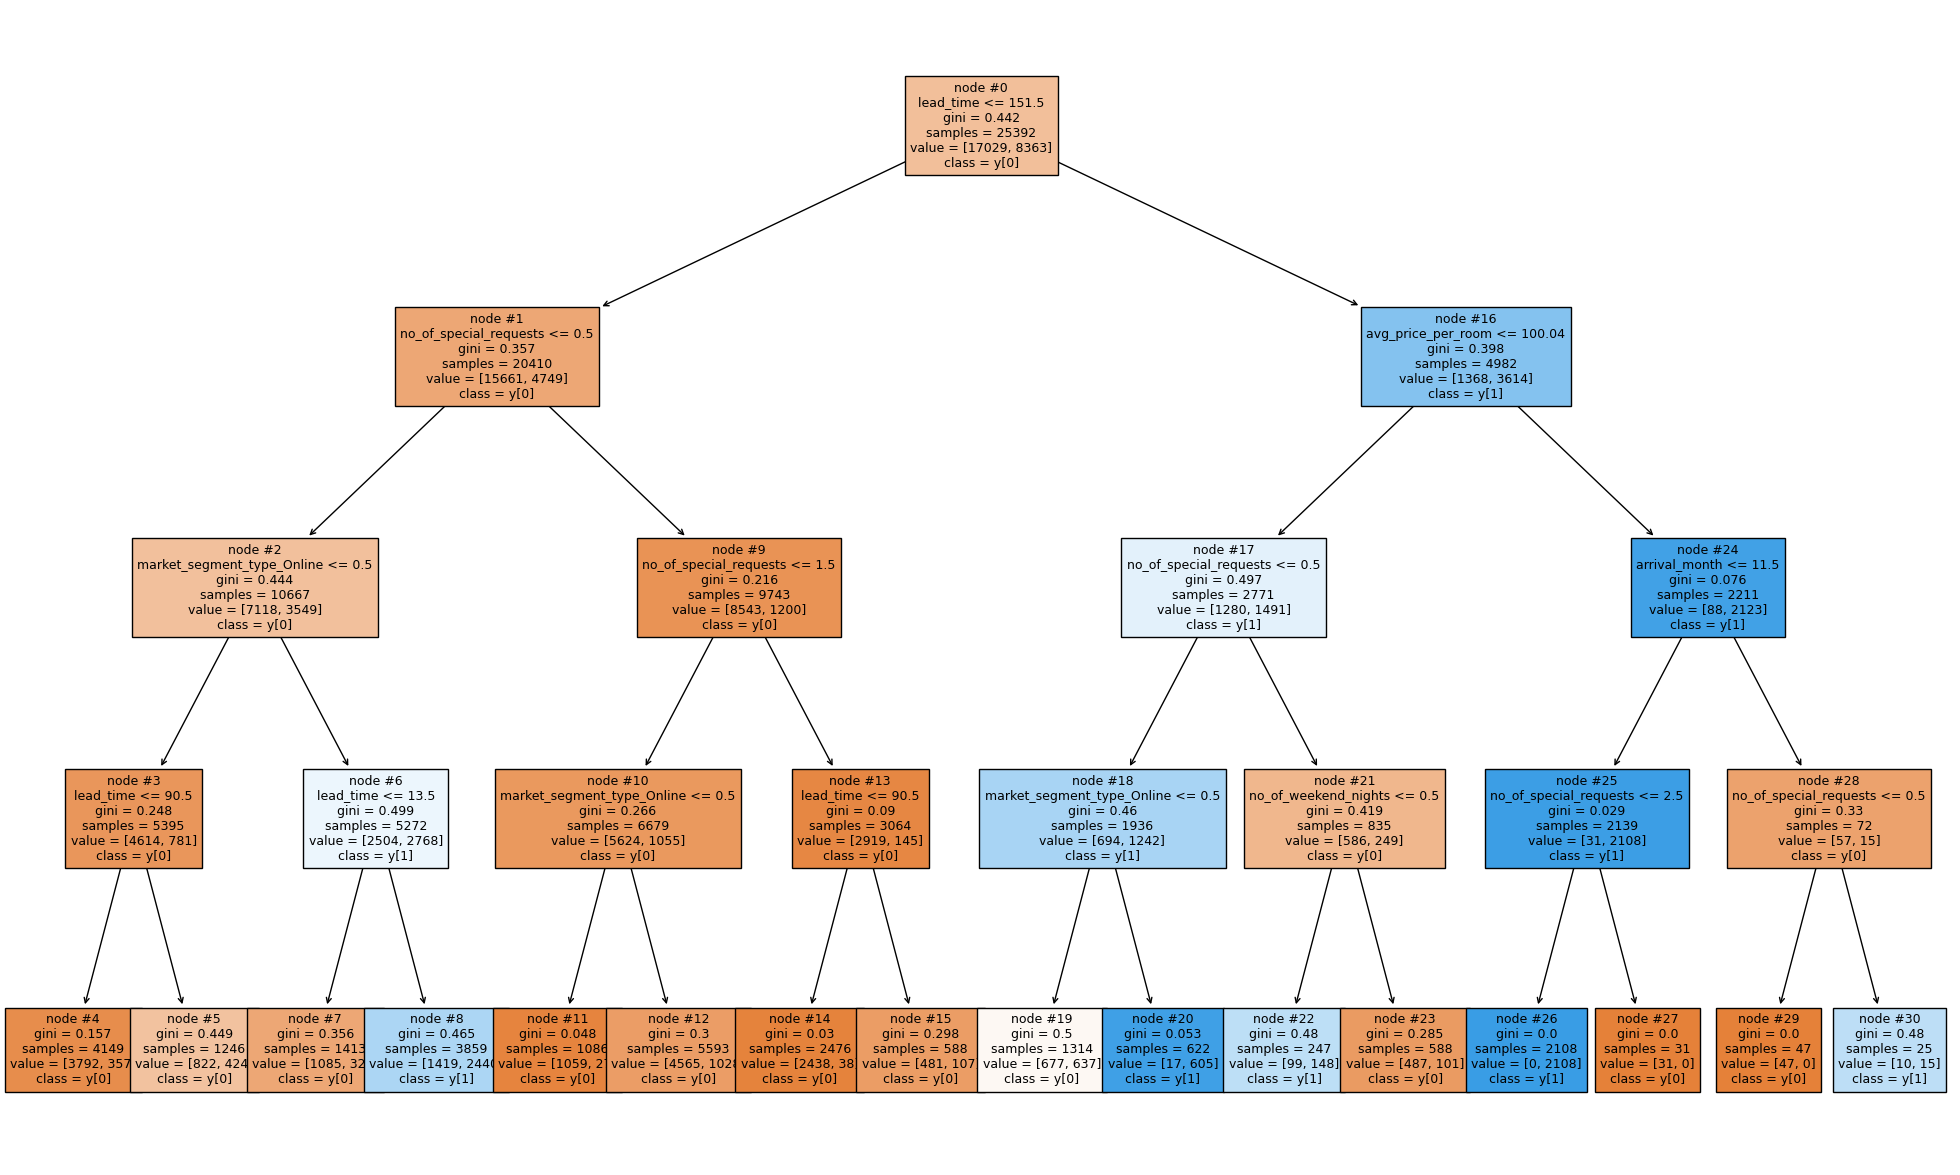

In [138]:
plt.figure(figsize=(25,15))
tree.plot_tree(dt2,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

This tree is a lot less cluttered than the previous and can actually be analyzed due to reduced overfitting.

In [146]:
estimator = DecisionTreeClassifier(random_state =1) #Using GridSearchCV to find the best combination of hyperparameters

parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,50],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [147]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))

Accuracy on training set :  0.7694943289224953
Accuracy on test set :  0.7719378847744188


The combination of parameters provided by the gridsearch yielded a lower accuracy than the previous models, but it is also the first model to perform better on the test than the training data.

In [161]:
pred_train = estimator.predict(X_train) #gathering f1 score
pred_test = estimator.predict(X_test)

print("f1 on training set : ",metrics.f1_score(y_train,pred_train))
print("f1 on test set : ",metrics.f1_score(y_test,pred_test))

f1 on training set :  0.6856099264113446
f1 on test set :  0.6851851851851852


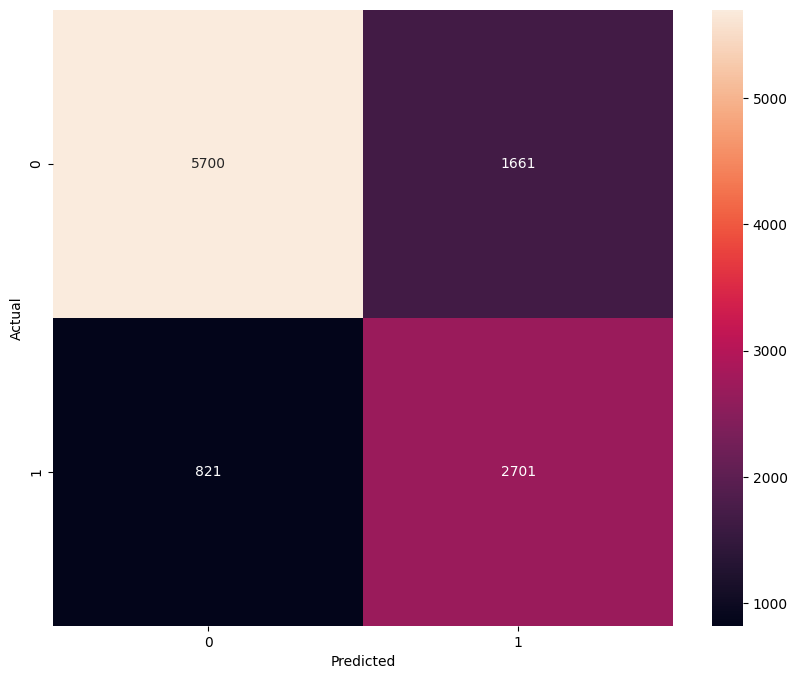

In [162]:
cm = confusion_matrix(y_test, pred_test) #making confusion matrix of the model perfomance on testing data
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [149]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [150]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007572
1,1.219272e-07,0.007572
2,4.688391e-07,0.007573
3,5.329960e-07,0.007573
4,6.133547e-07,0.007575
...,...,...
1339,6.665684e-03,0.286897
1340,1.304480e-02,0.299942
1341,1.725993e-02,0.317202
1342,2.399048e-02,0.365183


In [151]:
clfs = []
for ccp in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp)
  clf.fit(X_train, y_train)
  clfs.append(clf)



In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


In [152]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


In [154]:
index_bm = np.argmax(test_scores)
best_model = clfs[index_bm]
print(best_model)
print('training accuracy ', best_model.score(X_train, y_train))
print('test accuracy', best_model.score(X_test, y_test))


DecisionTreeClassifier(ccp_alpha=0.0001539860044762384, random_state=1)
training accuracy  0.8926827347195967
test accuracy 0.8811908481117339


In [165]:
pred_train = best_model.predict(X_train) #gathering f1 score
pred_test = best_model.predict(X_test)

print("f1 on training set : ",metrics.f1_score(y_train,pred_train))
print("f1 on test set : ",metrics.f1_score(y_test,pred_test))

f1 on training set :  0.831966454954677
f1 on test set :  0.8107158541941151


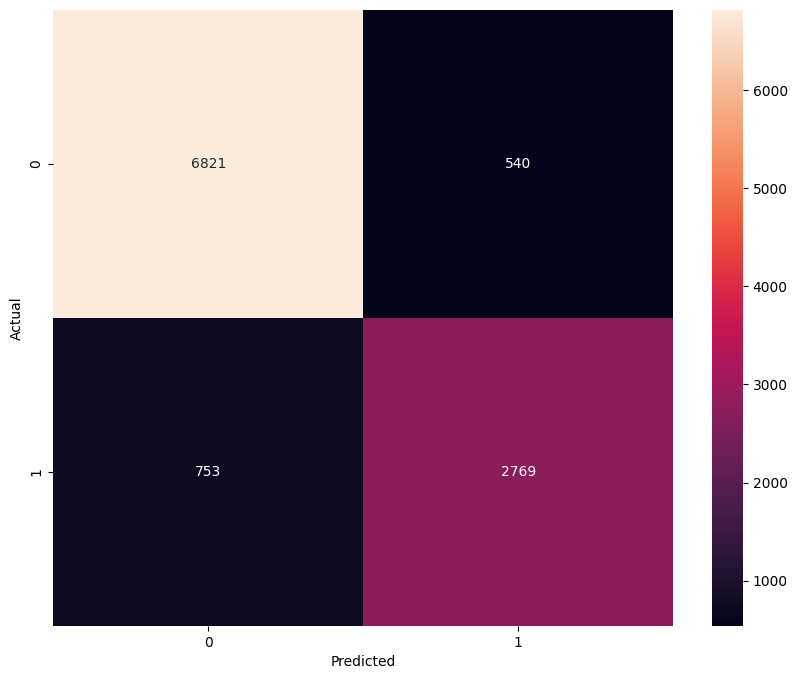

In [166]:
cm = confusion_matrix(y_test, pred_test) #making confusion matrix of the model perfomance on testing data
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

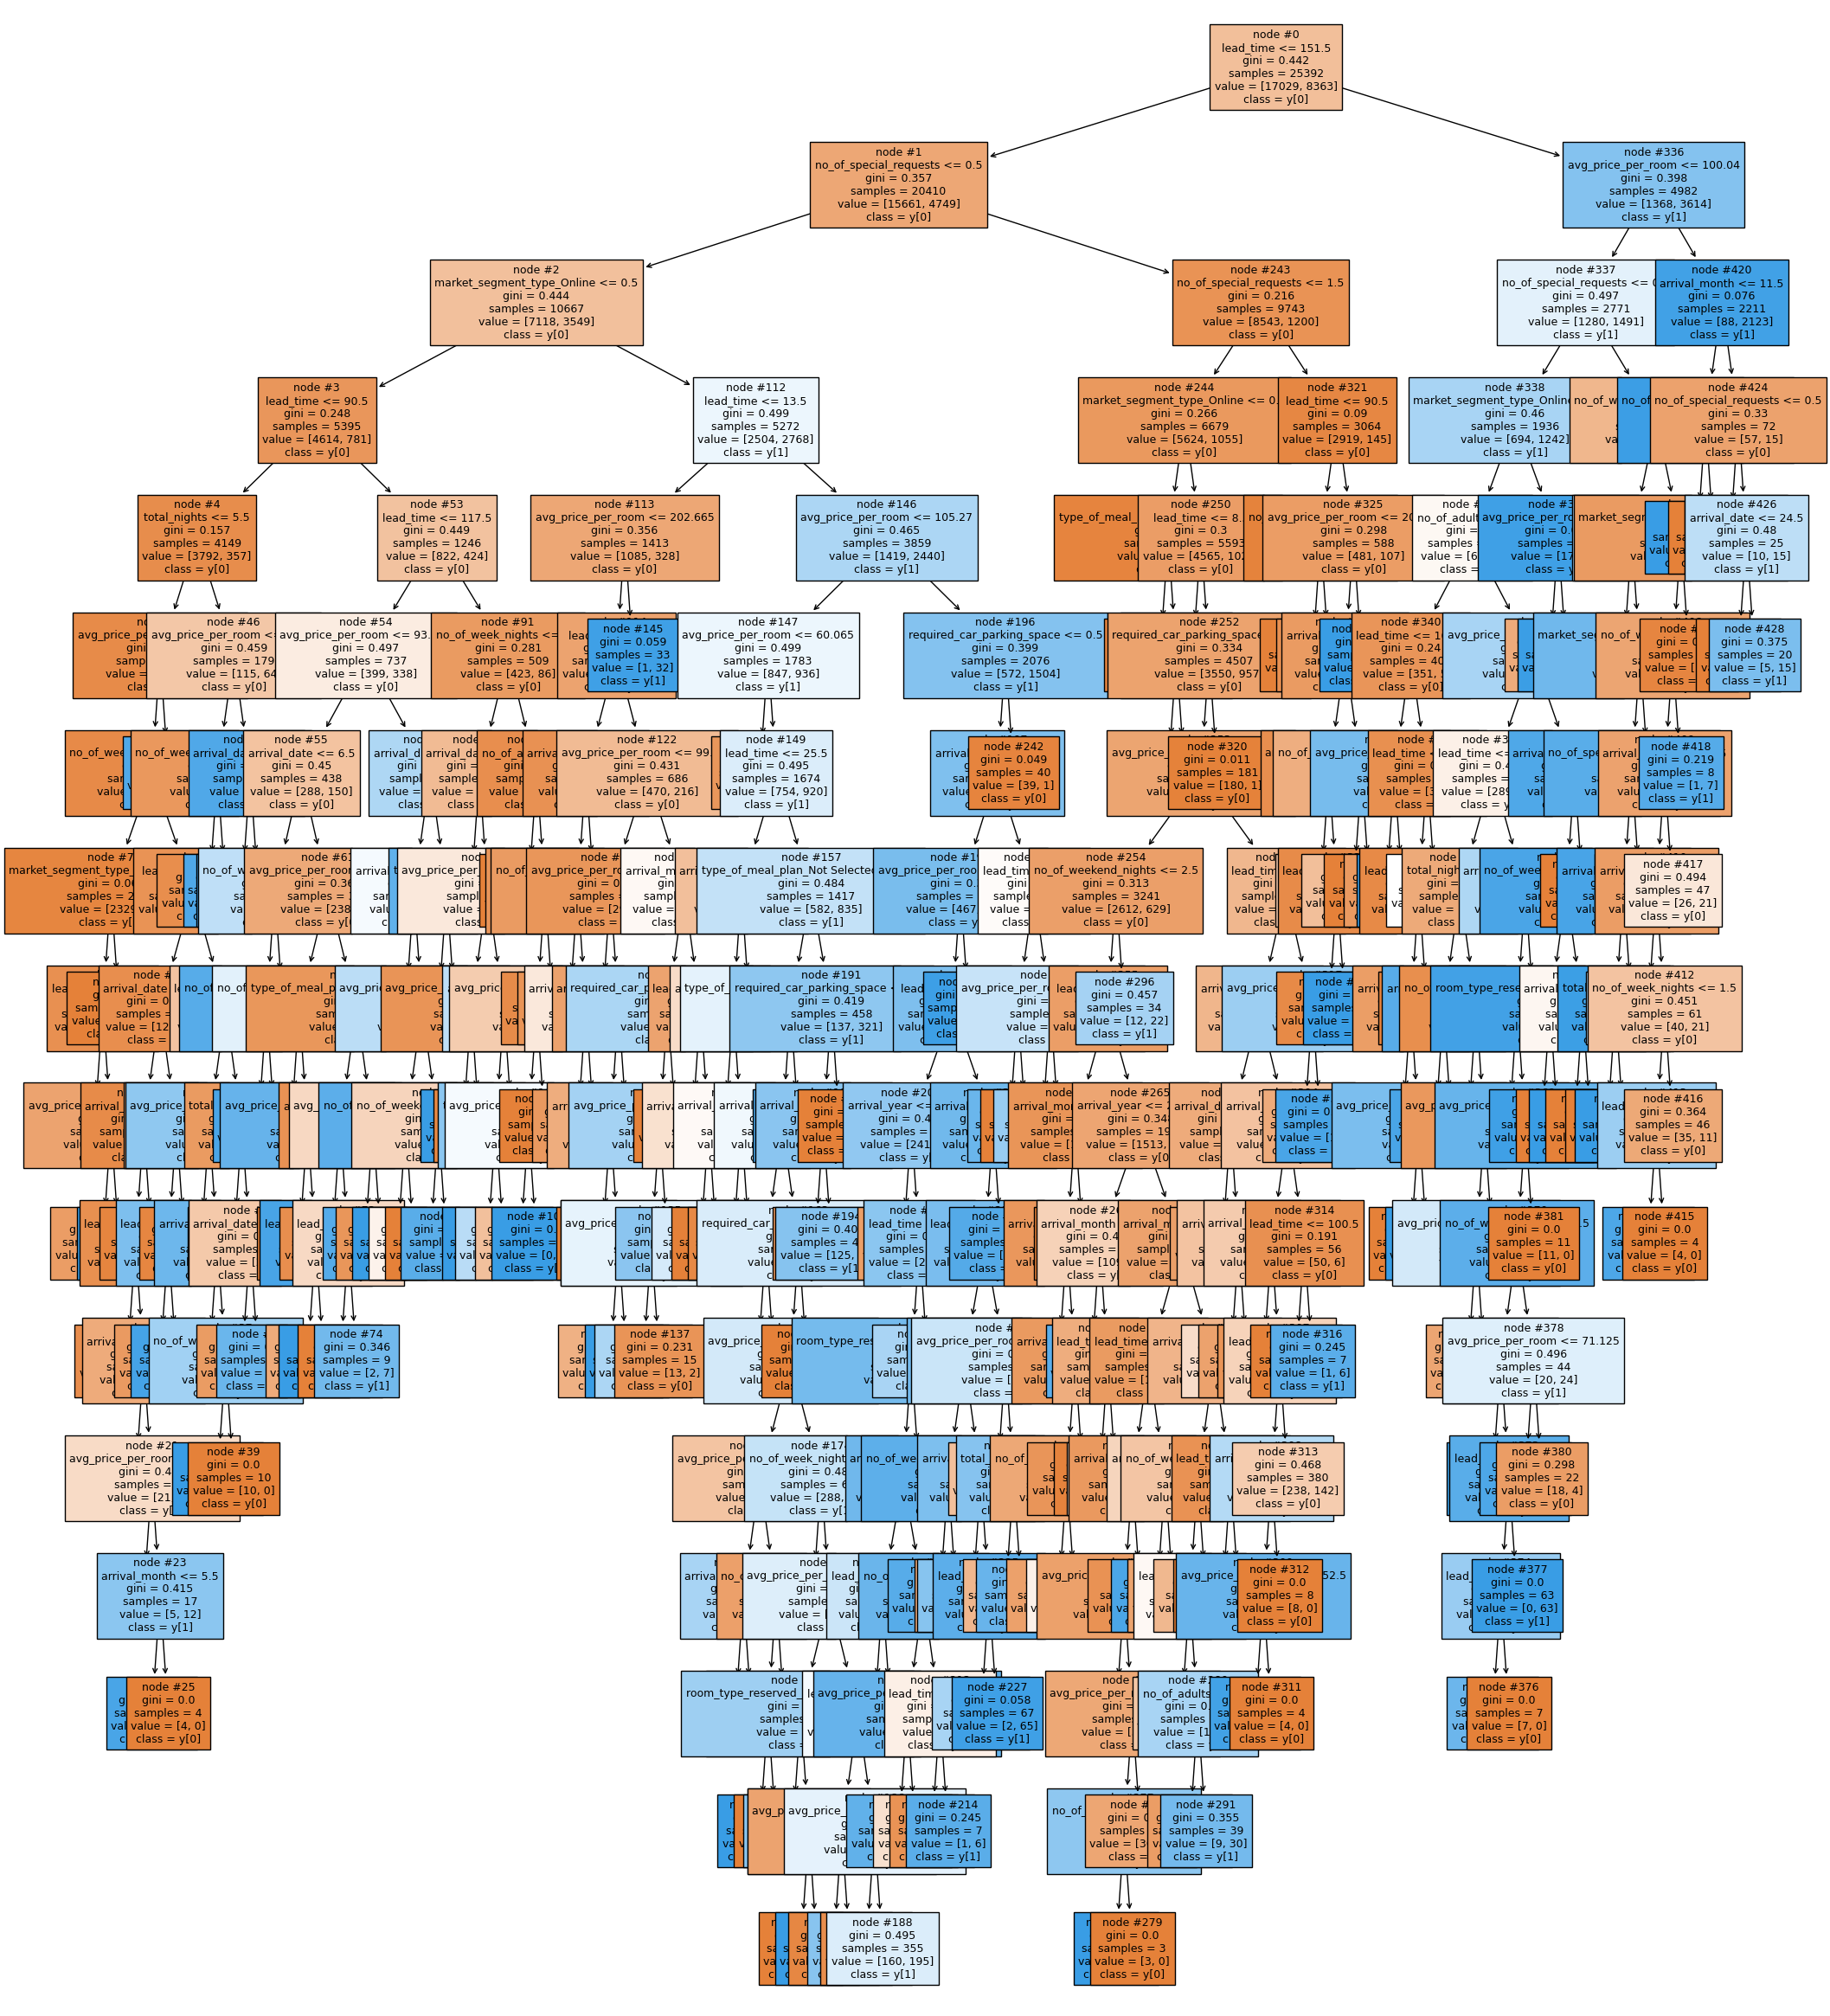

In [157]:
plt.figure(figsize=(25,30))
tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## Model Performance Comparison and Conclusions

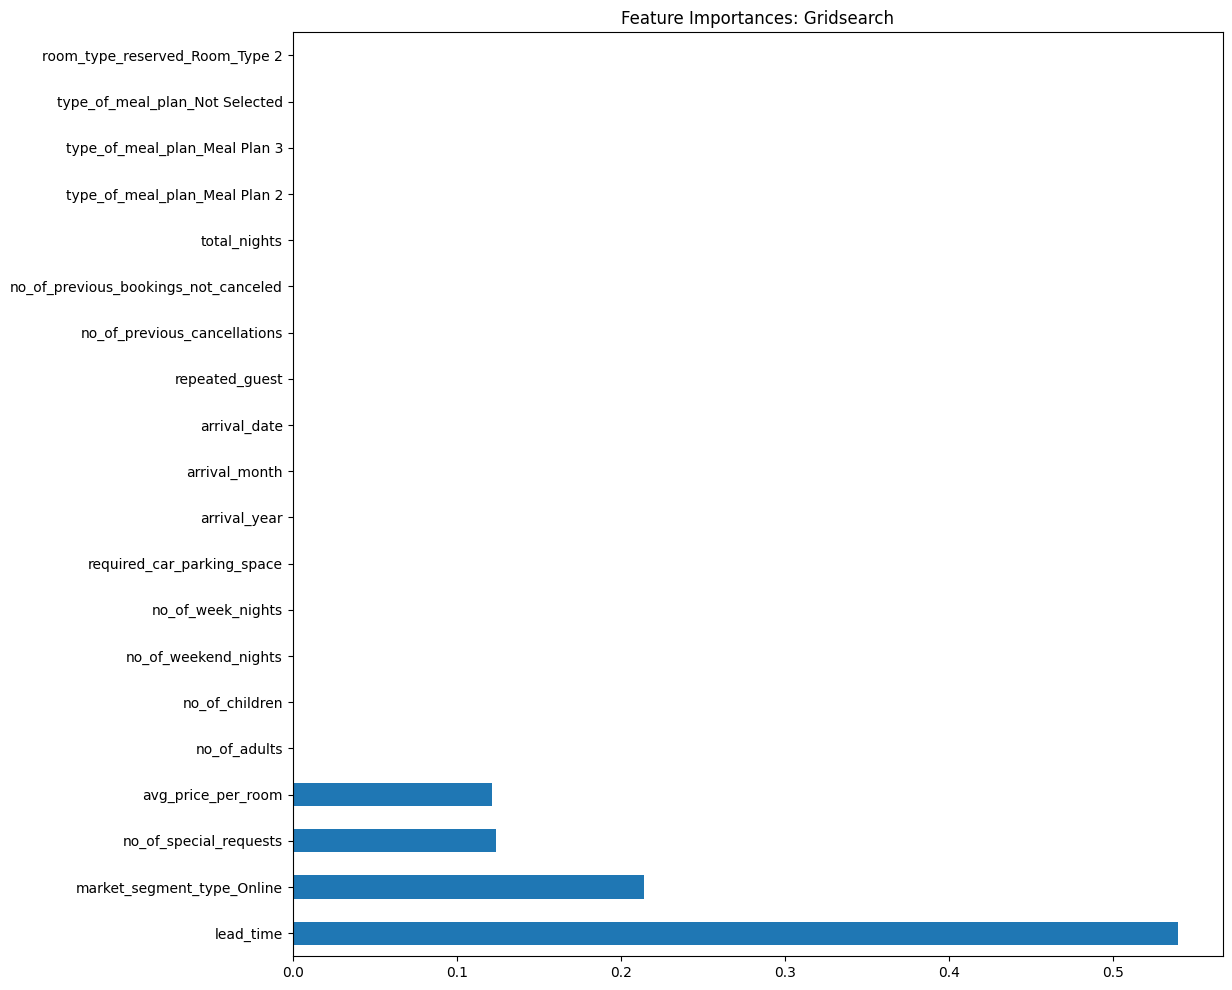

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances: Gridsearch')

feat_importances = pd.Series(estimator.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

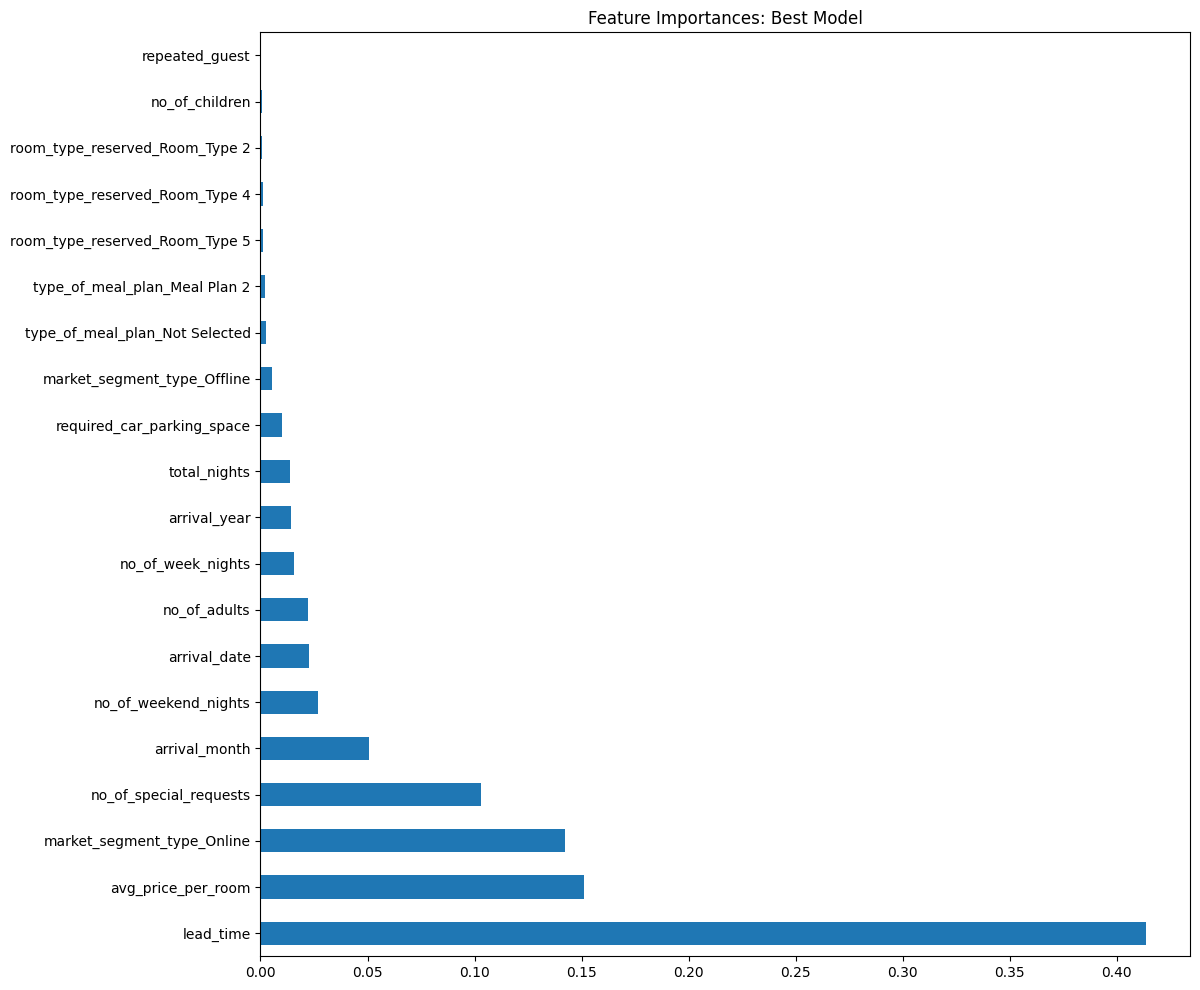

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances: Best Model')

feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

Both of the models value the same 4 variables the most: number of special requests, market segment type being online, average price per room, and lead time (the most valuable variable in both).

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?



*   Since lead time was singled out as potentially the most important factor in cancellations, I would suggest having a cutoff on how early reservations can be made. Or restrict very far in advance reservations to reward members (repeat guests)
*   Another potential guideline identified by the model is that reservations made with additional special requests are less likely to cancel; therefore, if having to chose which rooms to overbook, consider not doing so in rooms with special requests.


*   The models also indicate that people who place a reservation online are more likely to cancel, so additionaly suspicion should be had with online reservations relative other reservation types.
*   Average price of the room also seems to affect cancelation, with more expensive rooms being less likely to cancel.





In [172]:
!jupyter nbconvert --to html DB_INNHotels_FullCode.ipynb

[NbConvertApp] WARNING | pattern 'DB_INNHotels_FullCode.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e